In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from numpy import *
from math import *
import sys
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as pltc
from numpy.linalg import eig

In [2]:
# Read input data
inputData = pd.read_csv("Dataset 1.txt", sep='\t', lineterminator='\n', header=None)

In [3]:
# Divide data and ground truth clusters
data = inputData[inputData.columns[2:]]
groundTruthClusters = inputData[inputData.columns[1:2]]

In [4]:
# Assign parameters
epsilon = 0.14
minimumPoints = 5

In [5]:
###########################################
# Function to find neighbours of a point
###########################################
def findNeighbours(data,currentItem,epsilon):
    
    neighbors = []

    for neighbourItem in range(0,len(data)):
        if(np.sqrt(((((data.to_numpy())[currentItem]) - ((data.to_numpy())[neighbourItem]))**2).sum())) < epsilon:
            neighbors.append(neighbourItem)
    
    return neighbors

In [6]:
###########################################
# Function to expand a cluster 
###########################################
def propogateCluster(data,visited,currentItem,neighbours,C,epsilon,minimumPoints):
    
    visited[currentItem] = C
    
    i = 0
    while i < len(neighbours):
        
        nextDataPoint = neighbours[i];
        
        if(visited[nextDataPoint]) == -1:
            visited[nextDataPoint] = C
        elif visited[nextDataPoint] == 0:
            visited[nextDataPoint] = C
            
            nextNeighbours = findNeighbours(data,nextDataPoint,epsilon)
            
            if len(nextNeighbours) >= minimumPoints:
                neighbours = neighbours + nextNeighbours
            
        i += 1

In [7]:
###########################################
# Main function of DBSCAN
###########################################
def DBSCAN(data,epsilon,minimumPoints):
    
    visited = [0] * len(data)
    
    C = 0
    
    # Iterate over all the input data
    for currentItem in range(0,len(data)):
        
        # If currentItem is already visited
        if not (visited[currentItem] == 0):
            continue
        
        # Find all of P's neighboring points.
        neighbours = findNeighbours(data,currentItem,epsilon)
        
        # If data point is noise
        if len(neighbours) < minimumPoints:
            visited[currentItem] = -1
        #  Else include it in one of the cluster
        else:
            C += 1
            propogateCluster(data,visited,currentItem,neighbours,C,epsilon,minimumPoints)
    
    return visited

In [8]:
# Call the DBSCAN function and save the clustering result
output = DBSCAN(data,epsilon,minimumPoints)

In [9]:
#######################################################################
# Function to compute and plot PCA
#######################################################################
def plotPCA(data,labels):
    pca = PCA(n_components=2)
    data = np.matrix(data.T)
    pca.fit(data)
    pcaComponents = pca.components_
    plt.figure(figsize=(8,6))
    pc1 = pcaComponents[0,]
    pc2 = pcaComponents[1,]
    setOfLabels = list(set(labels))
    colours = []
    for i in range(len(setOfLabels)):
        colours.append(plt.cm.jet(float(i)/max(setOfLabels)))
    for i, j in enumerate(setOfLabels):    
        x = []
        y = []
        for p in range(len(pc1)):
            if labels[p] == j:
                x.append(pc1[p])
        for q in range(len(pc1)):
            if labels[q] == j:
                y.append(pc2[q])
        plt.scatter(x, y, c=colours[i], label=str(j))  
    plt.legend()
    plt.title("Dataset 1")
    plt.xlabel("PC 1")
    plt.ylabel("PC 2")
    plt.show()

In [10]:
#######################################################################
# Function to plot our final clusters
#######################################################################
def plot2DData(data,output):
    all_colors = [k for k,v in pltc.cnames.items()]
    setOfLabels = [l[0] for l in groundTruthClusters.to_numpy()]
    color = ['black' if l == -1 else all_colors[l+11] for l in output]
    labelList = []
    all_colors = [k for k,v in pltc.cnames.items()]
    for i in list(set(output)):
        if i == -1:
            labelList.append(mpatches.Patch(color = 'black',label = str(i)))
        else:
            labelList.append(mpatches.Patch(color = all_colors[i+11],label = str(i)))
    fig = plt.figure(figsize=(8,6))
    plt.scatter(data.to_numpy()[:,0],data.to_numpy()[:,1], color = color)
    plt.legend(handles=labelList)
    plt.xlabel("x")
    plt.ylabel("y")
    plt.title("Dataset 1")
    plt.show()

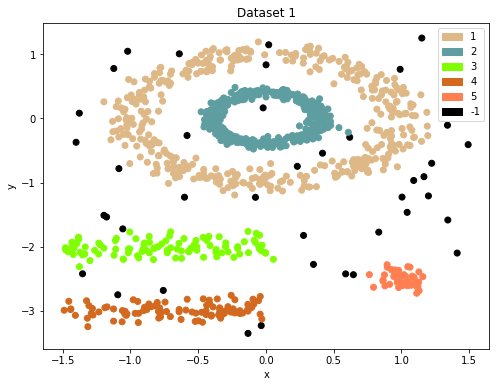

In [11]:
if(len(data.iloc[0]) == 2):
    plot2DData(data,output)
else:
    plotPCA(data.values,output)

In [12]:
#######################################################################
# Function to compute Jaccard coefficient and Rand index
#######################################################################
def metric(data,groundTruthClusters,output):
    m11=0
    m10=0
    m01=0
    m00=0
    
    for i in range(0,len(data)):
        for j in range(1,len(data)):
            if((groundTruthClusters.to_numpy())[i] == (groundTruthClusters.to_numpy())[j] and output[i] == output[j]):
                m11=m11+1
            elif((groundTruthClusters.to_numpy())[i] == (groundTruthClusters.to_numpy())[j] and not (output[i] == output[j])):
                m10=m10+1
            elif(not((groundTruthClusters.to_numpy())[i] == (groundTruthClusters.to_numpy())[j]) and output[i] == output[j]):
                m01=m01+1
            elif(not((groundTruthClusters.to_numpy())[i] == (groundTruthClusters.to_numpy())[j]) and not(output[i] == output[j])):
                m00=m00+1

    jacard_coeff=float(m11)/float((m11+m01+m10))
    print("jaccard_coefficient: ", jacard_coeff)
    rand_index=float((m11+m00))/float((m11+m00+m10+m01))
    print("rand_index: ", rand_index)

In [13]:
# Compute Jaccard coefficient and Rand index
metric(data,groundTruthClusters,np.asarray(output))

jaccard_coefficient:  0.9457246739869735
rand_index:  0.9839597981636198
